In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:

#data = pd.read_csv('/kaggle/input/energy-consumption-dataset-linear-regression/train_energy_data.csv')
# I couldn't connect datas through kaggle api so i downloade and connected them manually
data = pd.read_csv('train_energy_data.csv')

In [9]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


**Data exploring**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [11]:
data.duplicated().sum()

0

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Square Footage,1000.0,25462.38800,14294.554000,560.00,13169.7500,25477.000,37446.25,49997.00
Number of Occupants,1000.0,48.37200,29.061972,1.00,22.0000,47.000,73.25,99.00
Appliances Used,1000.0,25.60600,14.105166,1.00,13.0000,26.000,38.00,49.00
Average Temperature,1000.0,22.61139,7.139943,10.05,16.4750,22.815,28.85,34.99
Energy Consumption,1000.0,4166.25257,933.313064,1683.95,3509.4825,4175.730,4863.85,6530.60


In [13]:
data.describe(include=object).T

,count,unique,top,freq
Building Type,1000,3,Residential,347
Day of Week,1000,2,Weekday,507


**Data analysis**

In [14]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
data.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

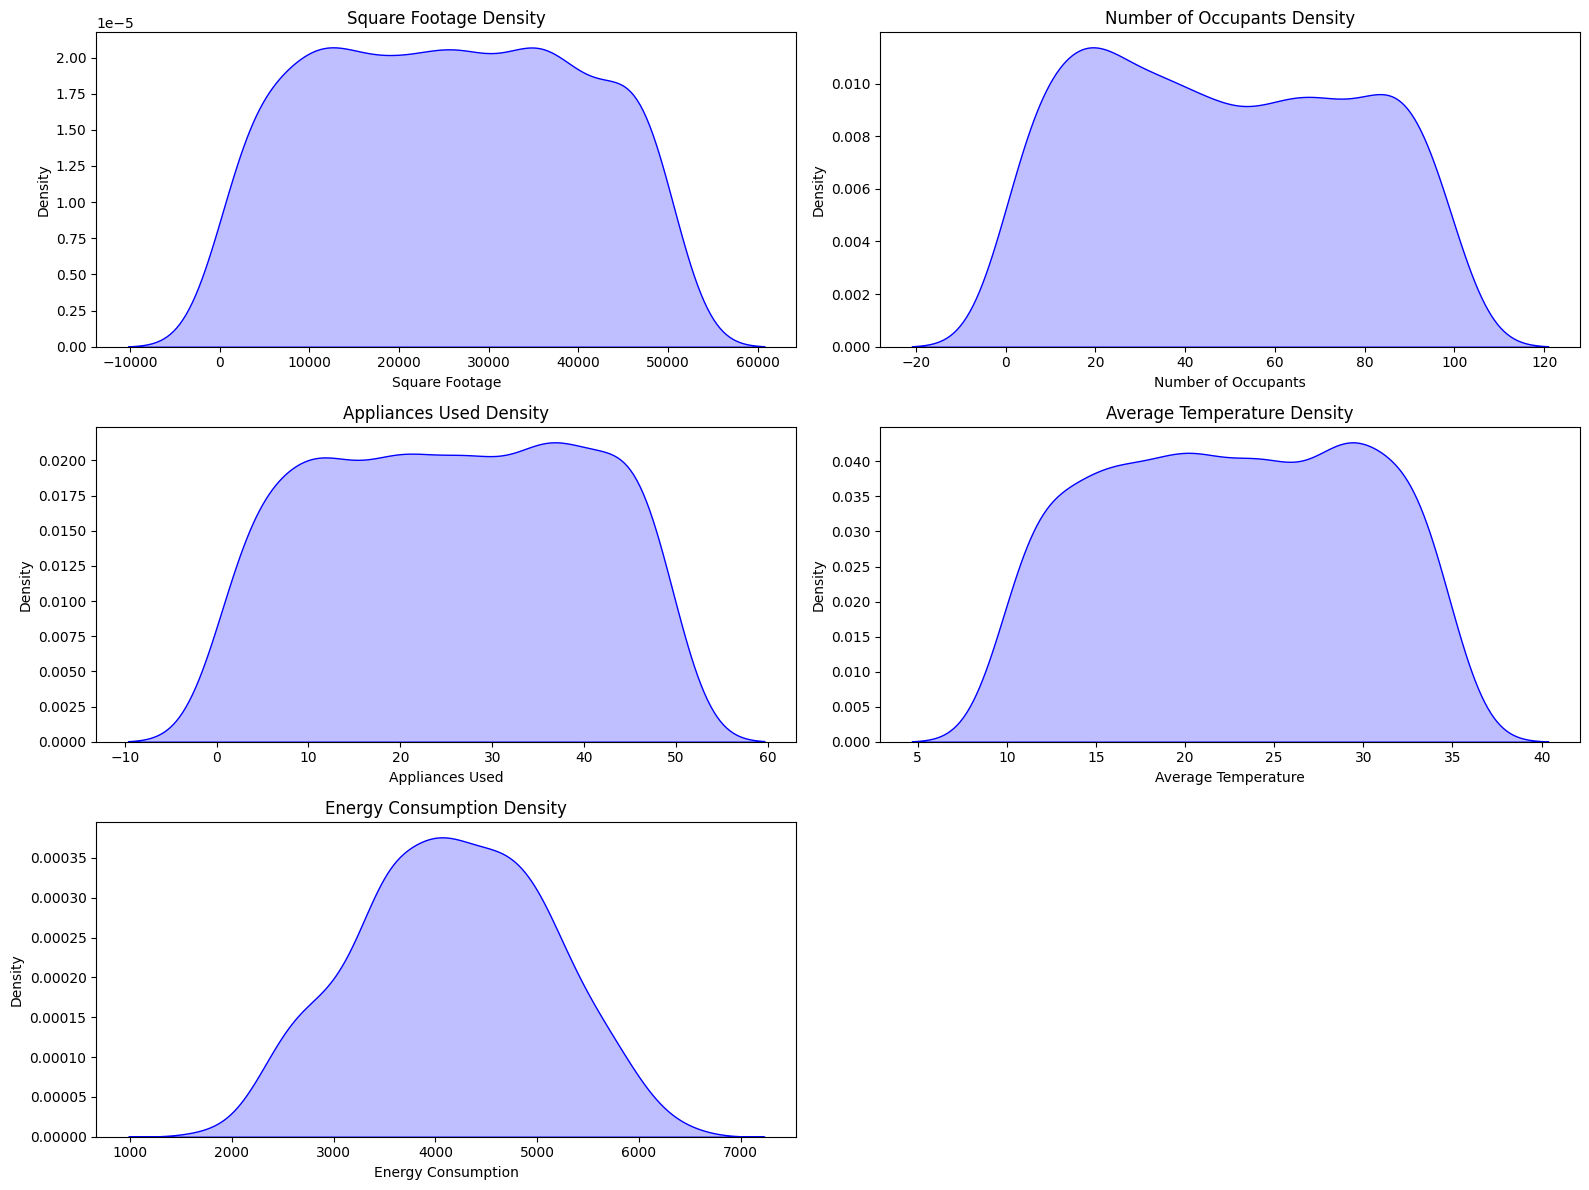

In [16]:
# Plotting kernel density for each numerical column to see their distribution

num_cols = ['Square Footage', 'Number of Occupants',
            'Appliances Used', 'Average Temperature',
            'Energy Consumption']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

axes = axes.flatten()

for col, ax in zip(num_cols, axes):
    sns.kdeplot(data[col], ax=ax, color="Blue", fill=True) 
    ax.set_title(f"{col} Density")  

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

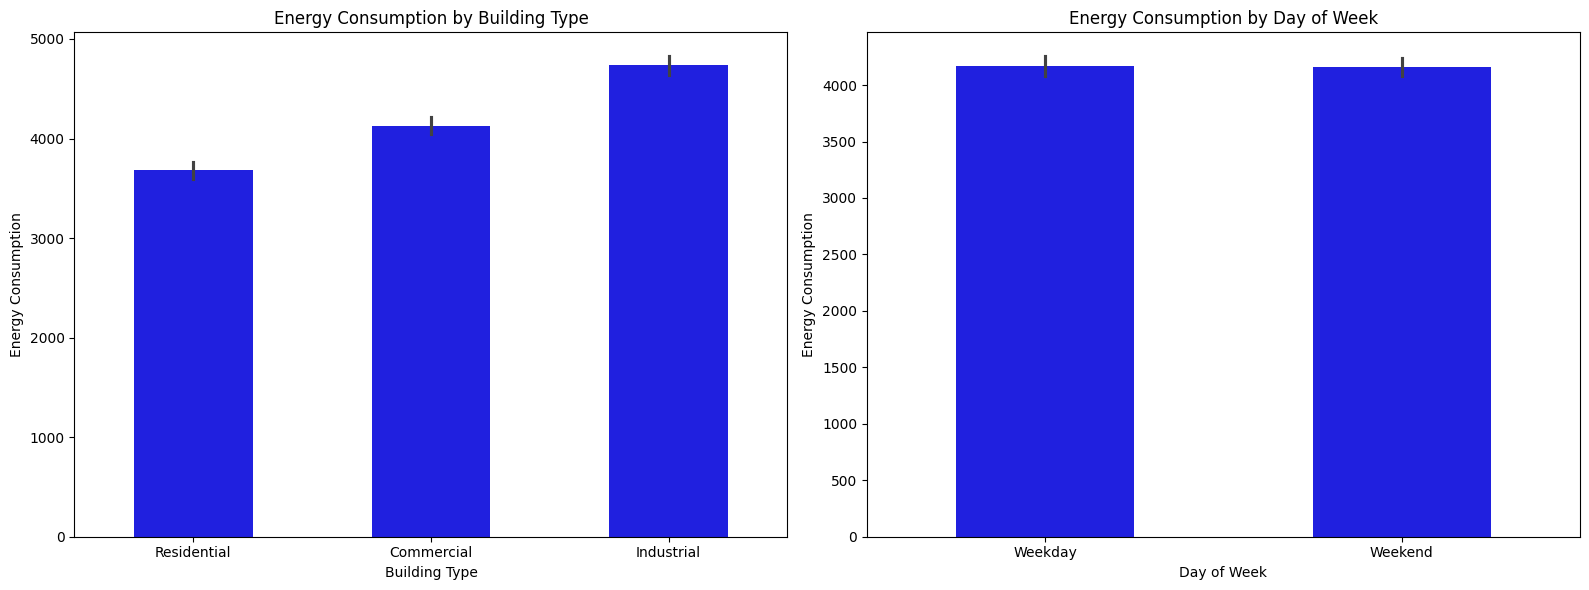

In [17]:
# Energy consumption distribution by categorical columns

obj_cols = ["Building Type", "Day of Week"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

for col, ax in zip(obj_cols, axes):
    sns.barplot(data=data, x=col, y="Energy Consumption", ax=ax, color="blue", width=0.5)
    ax.set_title(f"Energy Consumption by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Energy Consumption")

plt.tight_layout()
plt.show()

In [18]:
# Encoding categorical columns

building_type_encoding = {
    'Residential': 0,
    'Commercial': 1,
    'Industrial': 2
}

day_of_week_encoding = {
    'Weekday': 0,
    'Weekend': 1,
}

data["Building Type"] = data["Building Type"].map(building_type_encoding)
data["Day of Week"] = data["Day of Week"].map(day_of_week_encoding)

data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,7063,76,10,29.84,0,2713.95
1,1,44372,66,45,16.72,0,5744.99
2,2,19255,37,17,14.30,1,4101.24
3,0,13265,14,41,32.82,0,3009.14
4,1,13375,26,18,11.92,0,3279.17


In [19]:
correlation = data.corr()
correlation

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
Building Type,1.000000,0.009403,0.025922,0.024841,-0.006448,0.026504,0.458783
Square Footage,0.009403,1.000000,0.033379,-0.013478,0.027273,0.011354,0.774873
Number of Occupants,0.025922,0.033379,1.000000,0.023646,0.014122,0.014296,0.354485
Appliances Used,0.024841,-0.013478,0.023646,1.000000,-0.062870,-0.009046,0.312792
Average Temperature,-0.006448,0.027273,0.014122,-0.062870,1.000000,-0.011106,-0.034487
Day of Week,0.026504,0.011354,0.014296,-0.009046,-0.011106,1.000000,-0.004393
Energy Consumption,0.458783,0.774873,0.354485,0.312792,-0.034487,-0.004393,1.000000


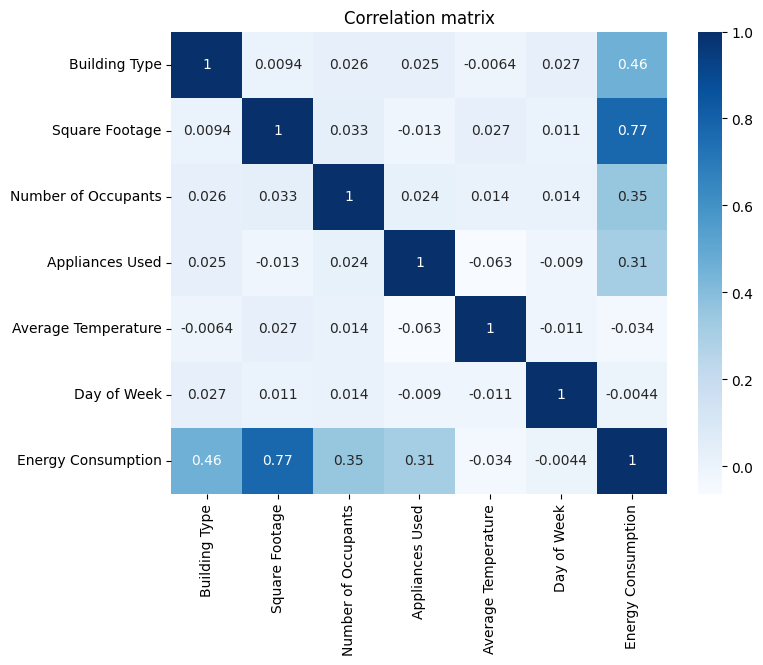

In [20]:
# Plotting correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(data=correlation, annot=True, fmt=".2g", cmap="Blues")
plt.title("Correlation matrix")
plt.show()

By analysing correlation matrix, we can clearly see a high correlation between "Square Footage" and "Energy Consumption", also, some significates correlations between "Building Type", Number of Occupants", 
"Appliances Used" and "Energy Consumption".

In [21]:
#test = pd.read_csv('/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv')
test = pd.read_csv('test_energy_data.csv')
test.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [23]:
# Encoding categorical columns in Test data
test["Building Type"] = test["Building Type"].map(building_type_encoding)
test["Day of Week"] = test["Day of Week"].map(day_of_week_encoding)

test.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,24563,15,4,28.52,0,2865.57
1,1,27583,56,23,23.07,1,4283.80
2,1,45313,4,44,33.56,0,5067.83
3,0,41625,84,17,27.39,1,4624.30
4,0,36720,58,47,17.08,0,4820.59


**Models preparation**

In [25]:
X_train = data.drop(["Energy Consumption"], axis=1) 
y_train = data["Energy Consumption"] 

X_test = test.drop(["Energy Consumption"], axis=1) 
y_test = test["Energy Consumption"] 

In [26]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1000, 6)
y_train shape: (1000,)
X_test shape: (100, 6)
y_test shape: (100,)


**Applying models**

In [27]:
# Models importation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression mean square error is : {lr_mse}")
print(f"Linear Regression r2 score is : {lr_r2}")

lr.coef_

Linear Regression mean square error is : 0.00020155156454450124
Linear Regression r2 score is : 0.9999999997062891


array([ 5.00000338e+02,  4.99999871e-02,  1.00000030e+01,  2.00000200e+01,
       -5.00004616e+00, -5.00007720e+01])

In [30]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300]     # Trees number
}

rfr = RandomForestRegressor(random_state=42)

# Grid Search configuration
grid_search = GridSearchCV(estimator=rfr,
                           param_grid=param_grid,
                           cv=5,                  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Use mean square error metric
                           n_jobs=-1,  
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best hyperparameter :", grid_search.best_params_)

print("Best score (RMSE) :", (-grid_search.best_score_)**0.5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameter : {'n_estimators': 300}
Best score (RMSE) : 125.34280363073944


In [31]:
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_r2 = r2_score(y_test, rfr_pred)

print(f"Random Forest Regressor mean square error is : {rfr_mse}")
print(f"Random Forest Regressor r2 score is : {rfr_r2}")

rfr.feature_importances_

Random Forest Regressor mean square error is : 14229.97123838986
Random Forest Regressor r2 score is : 0.979263383231535


array([0.18242185, 0.62442459, 0.09309283, 0.09269687, 0.0062128 ,
       0.00115105])

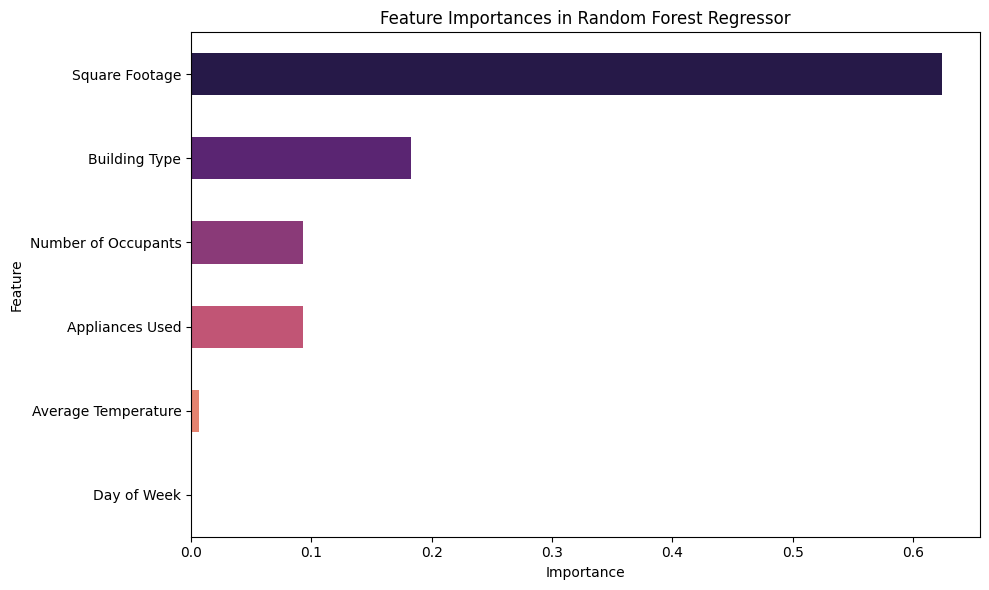

In [32]:
# Retrieve feature importances
importances = rfr.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importaces
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='magma', width=0.5)
plt.title('Feature Importances in Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [33]:
# Define the hyperparameter grid for Gradient Boosting model
param_grid = {
    'n_estimators': [100, 200, 300],     # Trees number
    'learning_rate': [0.1, 0.05, 0.01]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=5,                  # 5-Fold cross validation
                           scoring='neg_mean_squared_error',  # Use mean square error
                           n_jobs=-1,             
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best hyperparameters :", grid_search.best_params_)

print("Best score (RMSE) :", (-grid_search.best_score_)**0.5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters : {'learning_rate': 0.1, 'n_estimators': 300}
Best score (RMSE) : 72.82199261896405


In [34]:
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

print(f"Gradient Boosting Regressor mean square error is : {gbr_mse}")
print(f"Gradient Boosting Regressor r2 score is : {gbr_r2}")

Gradient Boosting Regressor mean square error is : 4132.3135449667
Gradient Boosting Regressor r2 score is : 0.9939781886474981


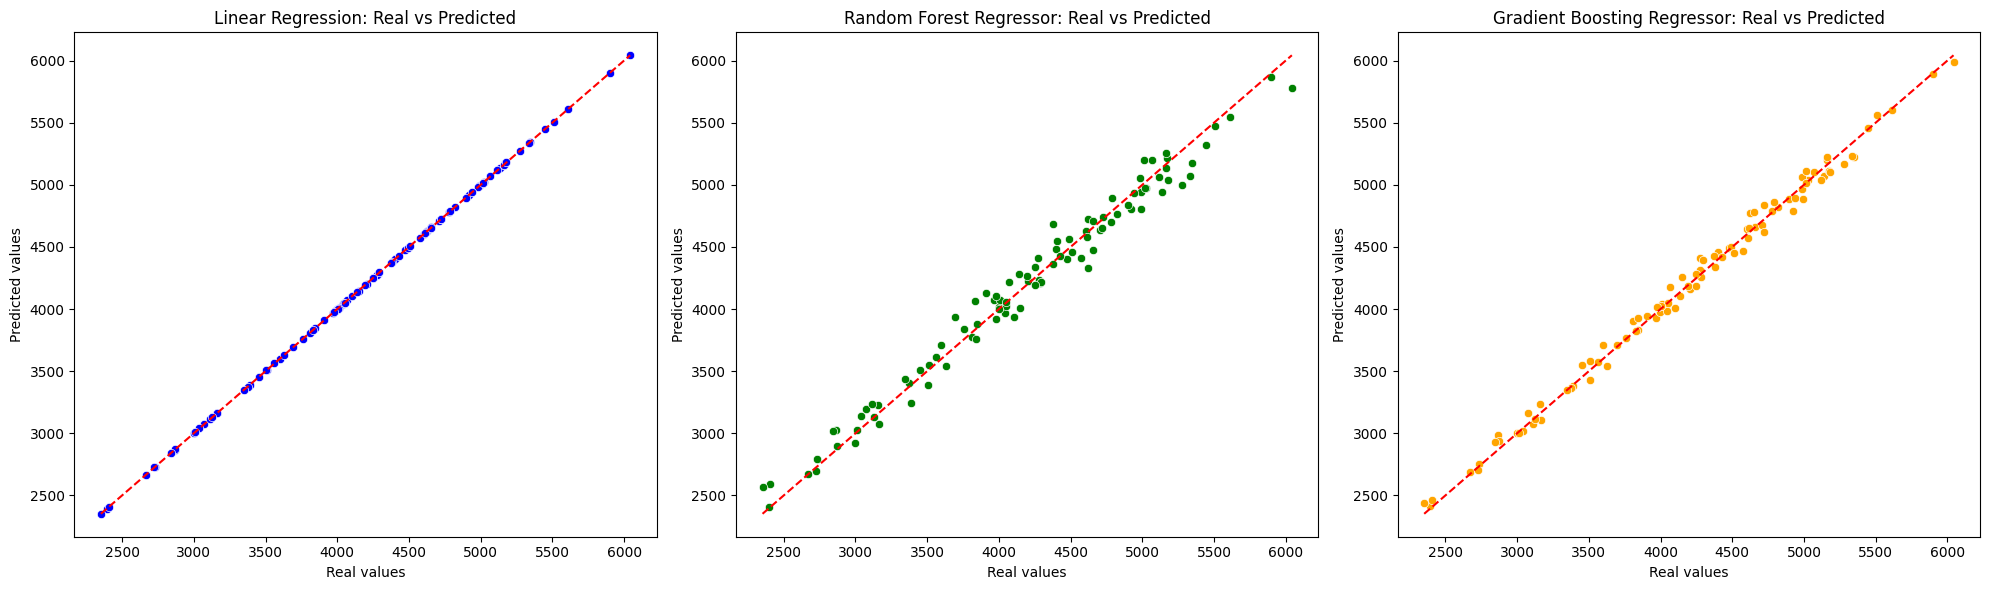

In [35]:
# Plotting models results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Linear Regression 
sns.scatterplot(x=y_test, y=lr_pred, ax=axes[0], color="blue")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[0].set_title('Linear Regression: Real vs Predicted')
axes[0].set_xlabel('Real values')
axes[0].set_ylabel('Predicted values')


# Random Forest Regressor
sns.scatterplot(x=y_test, y=rfr_pred, ax=axes[1], color="green")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[1].set_title('Random Forest Regressor: Real vs Predicted')
axes[1].set_xlabel('Real values')
axes[1].set_ylabel('Predicted values')

# Gradient Boosting Regressor
sns.scatterplot(x=y_test, y=gbr_pred, ax=axes[2], color="orange")
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[2].set_title('Gradient Boosting Regressor: Real vs Predicted')
axes[2].set_xlabel('Real values')
axes[2].set_ylabel('Predicted values')

plt.tight_layout()
plt.show()

We have obtained fantastic results with these three models. However, the best model, based on the mean square error (MSE) and R² score metrics, is clearly the Linear Regression model, with an MSE of 0.0002 and an R² score of 0.9999.

# Thank you for reviewing this notebook! 

**If you found the analysis useful, please don’t forget to upvote!**